In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import networkit as nk
import numpy as np
import matplotlib.pyplot as plt
import time
import phate

from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler

from External.ICT.calculate_ICT import calculate_ICT, compute_widths
from External.clustering import k_means_pp
from External.generation import create_graph
from External.create_k_nearest import is_connected

plt.style.use('standard.mplstyle')

# Hyperparameters
mode = "K_Nearest+Density2"
metric = "euclidean"
position, labels = phate.tree.gen_dla(n_dim=2, n_branch=3,
                                            branch_length=2500, rand_multiplier=2, seed=37, sigma=1)
position = StandardScaler().fit_transform(position)
number_of_nodes = len(position)

cv2 package not present. No movies possible


In [3]:
# calculate the cluster centers and the components
ε, δ = 0.03, 0.1
r = 1 / (ε**2) * (int(np.log2(number_of_nodes - 1)) + 1 + np.log(1/δ))
k = int(np.sqrt(r))
k = np.min((k, number_of_nodes))
cluster_centers, labels = k_means_pp(k, position, metric=metric, return_labels=True)
unique_labels = np.unique(labels)


components = []
for label in unique_labels:
    component = np.argwhere(label == labels).T
    assert len(component) == 1
    components.append(component[0])

sub_ICTs = []
for component in tqdm(components):
    
    # othervise choose a smaller k above!
    assert len(component) > 6
    
    sub_number_of_nodes = len(component)
    sub_G, _ = create_graph(sub_number_of_nodes, mode, position=position[component], k=4)
    sub_G.indexEdges()
    k_ = int(np.sqrt(1 / (ε**2) * int(np.log2(sub_number_of_nodes - 1)) + 1 + np.log(1/δ)))
    k = np.min((sub_number_of_nodes, k_))
    sub_cluster_centers = k_means_pp(k, position[component], metric=metric)
    sub_ICT = calculate_ICT(sub_G, algorithm_type="exact_own", cluster_centers=sub_cluster_centers,
                                   zeros_stay_zeros=True, update_G=1.1)
    sub_ICT.indexEdges()
    sub_ICTs.append(sub_ICT)

sklearn is done: 2.157820224761963
My own part is done: 0.038511037826538086


  0%|          | 0/130 [00:00<?, ?it/s]

calculating the densities for the density criterion:   0%|          | 0/70 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/173 [00:00<?, ?it/s]

sklearn is done: 0.2834043502807617
My own part is done: 0.0009710788726806641
good []


create edgeId array:   0%|          | 0/173 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/173 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/69 [00:00<?, ?it/s]

update Arr 173 -> 80
added 12 edges early
update Arr 80 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
added 2 edges early
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 69


calculating the densities for the density criterion:   0%|          | 0/49 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/131 [00:00<?, ?it/s]

sklearn is done: 0.22095274925231934
My own part is done: 0.0007424354553222656
good []


create edgeId array:   0%|          | 0/131 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/131 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/48 [00:00<?, ?it/s]

update Arr 131 -> 58
added 9 edges early
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53
update Arr 53 -> 53
update Arr 53 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
added 2 edges early
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 48


calculating the densities for the density criterion:   0%|          | 0/89 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/222 [00:00<?, ?it/s]

sklearn is done: 0.30310797691345215
My own part is done: 0.0013556480407714844
good []


create edgeId array:   0%|          | 0/222 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/222 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/88 [00:00<?, ?it/s]

update Arr 222 -> 112
added 9 edges early
update Arr 112 -> 101
added 3 edges early
update Arr 101 -> 97
added 3 edges early
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 96
update Arr 96 -> 96
update Arr 96 -> 95
added 2 edges early
update Arr 95 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 93
update Arr 93 -> 92
update Arr 92 -> 91
update Arr 91 -> 91
update Arr 91 -> 90
update Arr 90 -> 90
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 88


calculating the densities for the density criterion:   0%|          | 0/55 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/140 [00:00<?, ?it/s]

sklearn is done: 0.2279360294342041
My own part is done: 0.0007836818695068359
good []


create edgeId array:   0%|          | 0/140 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/140 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/54 [00:00<?, ?it/s]

update Arr 140 -> 66
added 6 edges early
update Arr 66 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 60
added 2 edges early
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 54


calculating the densities for the density criterion:   0%|          | 0/50 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/128 [00:00<?, ?it/s]

sklearn is done: 0.2165510654449463
My own part is done: 0.0007996559143066406
good []


create edgeId array:   0%|          | 0/128 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/128 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/49 [00:00<?, ?it/s]

update Arr 128 -> 56
added 12 edges early
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 53
update Arr 53 -> 53
update Arr 53 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49


calculating the densities for the density criterion:   0%|          | 0/37 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/94 [00:00<?, ?it/s]

sklearn is done: 0.1799945831298828
My own part is done: 0.0005362033843994141
good []


create edgeId array:   0%|          | 0/94 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/94 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/36 [00:00<?, ?it/s]

update Arr 94 -> 42
added 9 edges early
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
added 2 edges early
update Arr 41 -> 40
update Arr 40 -> 39
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 36
added 5 edges early


calculating the densities for the density criterion:   0%|          | 0/64 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/162 [00:00<?, ?it/s]

sklearn is done: 0.3570365905761719
My own part is done: 0.0016438961029052734
good []


create edgeId array:   0%|          | 0/162 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/162 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/63 [00:00<?, ?it/s]

update Arr 162 -> 72
added 8 edges early
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
added 2 edges early
update Arr 66 -> 65
added 2 edges early
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 63
added 10 edges early


calculating the densities for the density criterion:   0%|          | 0/53 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/134 [00:00<?, ?it/s]

sklearn is done: 0.2271277904510498
My own part is done: 0.0008714199066162109
good []


create edgeId array:   0%|          | 0/134 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/134 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/52 [00:00<?, ?it/s]

update Arr 134 -> 55
added 14 edges early
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 52
added 2 edges early


calculating the densities for the density criterion:   0%|          | 0/105 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/263 [00:00<?, ?it/s]

sklearn is done: 0.30944085121154785
My own part is done: 0.0013327598571777344
good []


create edgeId array:   0%|          | 0/263 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/263 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/104 [00:00<?, ?it/s]

update Arr 263 -> 116
added 21 edges early
update Arr 116 -> 114
update Arr 114 -> 114
update Arr 114 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 112
update Arr 112 -> 112
update Arr 112 -> 111
added 2 edges early
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 109
added 2 edges early
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 

calculating the densities for the density criterion:   0%|          | 0/79 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/194 [00:00<?, ?it/s]

sklearn is done: 0.2953016757965088
My own part is done: 0.001220703125
good []


create edgeId array:   0%|          | 0/194 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/194 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/78 [00:00<?, ?it/s]

update Arr 194 -> 89
added 15 edges early
update Arr 89 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 87
update Arr 87 -> 87
update Arr 87 -> 87
update Arr 87 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 81
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 7

calculating the densities for the density criterion:   0%|          | 0/40 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/105 [00:00<?, ?it/s]

sklearn is done: 0.18935465812683105
My own part is done: 0.0005707740783691406
good []


create edgeId array:   0%|          | 0/105 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/105 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/39 [00:00<?, ?it/s]

update Arr 105 -> 46
added 8 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 39


calculating the densities for the density criterion:   0%|          | 0/63 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/150 [00:00<?, ?it/s]

sklearn is done: 0.25049352645874023
My own part is done: 0.0009546279907226562
good []


create edgeId array:   0%|          | 0/150 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/150 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/62 [00:00<?, ?it/s]

update Arr 150 -> 70
added 12 edges early
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 62


calculating the densities for the density criterion:   0%|          | 0/41 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/103 [00:00<?, ?it/s]

sklearn is done: 0.20885801315307617
My own part is done: 0.0006289482116699219
good []


create edgeId array:   0%|          | 0/103 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/103 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/40 [00:00<?, ?it/s]

update Arr 103 -> 46
added 9 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 40
added 10 edges early


calculating the densities for the density criterion:   0%|          | 0/63 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/159 [00:00<?, ?it/s]

sklearn is done: 0.25398945808410645
My own part is done: 0.0009980201721191406
good []


create edgeId array:   0%|          | 0/159 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/159 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/62 [00:00<?, ?it/s]

update Arr 159 -> 71
added 10 edges early
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
added 2 edges early
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62


calculating the densities for the density criterion:   0%|          | 0/76 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/188 [00:00<?, ?it/s]

sklearn is done: 0.29485011100769043
My own part is done: 0.0012869834899902344
good []


create edgeId array:   0%|          | 0/188 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/188 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/75 [00:00<?, ?it/s]

update Arr 188 -> 87
added 16 edges early
update Arr 87 -> 85
update Arr 85 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
added 2 edges early
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 77
added 2 edges early
update Arr 77 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 75


calculating the densities for the density criterion:   0%|          | 0/65 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/162 [00:00<?, ?it/s]

sklearn is done: 0.2598555088043213
My own part is done: 0.0010783672332763672
good []


create edgeId array:   0%|          | 0/162 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/162 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/64 [00:00<?, ?it/s]

update Arr 162 -> 70
added 14 edges early
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 64


calculating the densities for the density criterion:   0%|          | 0/56 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/135 [00:00<?, ?it/s]

sklearn is done: 0.23027682304382324
My own part is done: 0.000782012939453125
good []


create edgeId array:   0%|          | 0/135 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/135 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/55 [00:00<?, ?it/s]

update Arr 135 -> 62
added 11 edges early
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
added 2 edges early
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 55


calculating the densities for the density criterion:   0%|          | 0/104 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/250 [00:00<?, ?it/s]

sklearn is done: 0.3072381019592285
My own part is done: 0.0013413429260253906
good []


create edgeId array:   0%|          | 0/250 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/250 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/103 [00:00<?, ?it/s]

update Arr 250 -> 114
added 15 edges early
update Arr 114 -> 113
added 2 edges early
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 110
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 108
update Arr 10

calculating the densities for the density criterion:   0%|          | 0/17 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/42 [00:00<?, ?it/s]

sklearn is done: 0.09116625785827637
My own part is done: 0.0004239082336425781
good []


create edgeId array:   0%|          | 0/42 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/42 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/16 [00:00<?, ?it/s]

update Arr 42 -> 30
added 2 edges early
update Arr 30 -> 27
added 2 edges early
update Arr 27 -> 25
update Arr 25 -> 22
update Arr 22 -> 22
update Arr 22 -> 19
update Arr 19 -> 18
update Arr 18 -> 16


calculating the densities for the density criterion:   0%|          | 0/33 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/90 [00:00<?, ?it/s]

sklearn is done: 0.1715686321258545
My own part is done: 0.0004878044128417969
good []


create edgeId array:   0%|          | 0/90 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/90 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/32 [00:00<?, ?it/s]

update Arr 90 -> 44
added 4 edges early
update Arr 44 -> 42
added 3 edges early
update Arr 42 -> 42
update Arr 42 -> 40
update Arr 40 -> 38
update Arr 38 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 33
update Arr 33 -> 33
update Arr 33 -> 32


calculating the densities for the density criterion:   0%|          | 0/54 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/138 [00:00<?, ?it/s]

sklearn is done: 0.22856974601745605
My own part is done: 0.0007574558258056641
good []


create edgeId array:   0%|          | 0/138 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/138 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/53 [00:00<?, ?it/s]

update Arr 138 -> 60
added 11 edges early
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 53


calculating the densities for the density criterion:   0%|          | 0/60 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/153 [00:00<?, ?it/s]

sklearn is done: 0.24229764938354492
My own part is done: 0.0008711814880371094
good []


create edgeId array:   0%|          | 0/153 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/153 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/59 [00:00<?, ?it/s]

update Arr 153 -> 69
added 10 edges early
update Arr 69 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 59


Patching the components together:   0%|          | 0/2 [00:00<?, ?it/s]

calculating the densities for the density criterion:   0%|          | 0/111 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/269 [00:00<?, ?it/s]

sklearn is done: 0.31124329566955566
My own part is done: 0.0016443729400634766
good []


create edgeId array:   0%|          | 0/269 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/269 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/110 [00:00<?, ?it/s]

update Arr 269 -> 120
added 20 edges early
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 119
update Arr 119 -> 119
update Arr 119 -> 119
update Arr 119 -> 118
update Arr 118 -> 118
update Arr 118 -> 118
update Arr 118 -> 118
update Arr 118 -> 118
update Arr 118 -> 118
update Arr 118 -> 118
update Arr 118 -> 117
added 2 edges early
update Arr 117 -> 117
update Arr 117 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 115
update Arr 115 -> 115
update Arr 115 -> 115
update Arr 115 -> 115
update Arr 115 -> 115
update Arr 115 -> 115
update Arr 115 -> 114
update Arr 11

Patching the components together:   0%|          | 0/2 [00:00<?, ?it/s]

calculating the densities for the density criterion:   0%|          | 0/33 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/80 [00:00<?, ?it/s]

sklearn is done: 0.16911911964416504
My own part is done: 0.0005786418914794922
good []


create edgeId array:   0%|          | 0/80 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/80 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/32 [00:00<?, ?it/s]

update Arr 80 -> 38
added 8 edges early
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 37
update Arr 37 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 35
update Arr 35 -> 35
update Arr 35 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 33
update Arr 33 -> 33
update Arr 33 -> 32
added 4 edges early


calculating the densities for the density criterion:   0%|          | 0/48 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/118 [00:00<?, ?it/s]

sklearn is done: 0.21062064170837402
My own part is done: 0.0007405281066894531
good []


create edgeId array:   0%|          | 0/118 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/118 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/47 [00:00<?, ?it/s]

update Arr 118 -> 55
added 6 edges early
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 53
added 2 edges early
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 51
added 2 edges early
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47


calculating the densities for the density criterion:   0%|          | 0/38 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/99 [00:00<?, ?it/s]

sklearn is done: 0.1821897029876709
My own part is done: 0.0005214214324951172
good []


create edgeId array:   0%|          | 0/99 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/99 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/37 [00:00<?, ?it/s]

update Arr 99 -> 42
added 5 edges early
update Arr 42 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
added 2 edges early
update Arr 39 -> 39
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 37


calculating the densities for the density criterion:   0%|          | 0/103 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/259 [00:00<?, ?it/s]

sklearn is done: 0.31311964988708496
My own part is done: 0.0014030933380126953
good []


create edgeId array:   0%|          | 0/259 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/259 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/102 [00:00<?, ?it/s]

update Arr 259 -> 110
added 21 edges early
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 105
update Arr 

calculating the densities for the density criterion:   0%|          | 0/76 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/191 [00:00<?, ?it/s]

sklearn is done: 0.29645204544067383
My own part is done: 0.0014562606811523438
good []


create edgeId array:   0%|          | 0/191 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/191 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/75 [00:00<?, ?it/s]

update Arr 191 -> 88
added 10 edges early
update Arr 88 -> 85
added 4 edges early
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 83
update Arr 83 -> 82
added 2 edges early
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
update Arr 81 -> 81
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 78
added 2 edges early
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 75


calculating the densities for the density criterion:   0%|          | 0/73 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/174 [00:00<?, ?it/s]

sklearn is done: 0.28471875190734863
My own part is done: 0.0011928081512451172
good []


create edgeId array:   0%|          | 0/174 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/174 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/72 [00:00<?, ?it/s]

update Arr 174 -> 82
added 8 edges early
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
added 2 edges early
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
added 2 edges early
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77

calculating the densities for the density criterion:   0%|          | 0/74 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/179 [00:00<?, ?it/s]

sklearn is done: 0.28156089782714844
My own part is done: 0.001127004623413086
good []


create edgeId array:   0%|          | 0/179 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/179 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/73 [00:00<?, ?it/s]

update Arr 179 -> 85
added 11 edges early
update Arr 85 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
added 2 edges early
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
added 2 edges early
update Arr 79 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
added 2 edges early
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 73


calculating the densities for the density criterion:   0%|          | 0/35 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/91 [00:00<?, ?it/s]

sklearn is done: 0.17529845237731934
My own part is done: 0.0005283355712890625
good []


create edgeId array:   0%|          | 0/91 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/91 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/34 [00:00<?, ?it/s]

update Arr 91 -> 46
added 4 edges early
update Arr 46 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 40
update Arr 40 -> 39
update Arr 39 -> 39
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 37
update Arr 37 -> 37
update Arr 37 -> 35
update Arr 35 -> 34


calculating the densities for the density criterion:   0%|          | 0/87 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/215 [00:00<?, ?it/s]

sklearn is done: 0.3051133155822754
My own part is done: 0.0012240409851074219
good []


create edgeId array:   0%|          | 0/215 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/215 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/86 [00:00<?, ?it/s]

update Arr 215 -> 102
added 8 edges early
update Arr 102 -> 95
update Arr 95 -> 95
update Arr 95 -> 94
added 2 edges early
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 92
added 2 edges early
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 91
update Arr 91 -> 90
added 2 edges early
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 

calculating the densities for the density criterion:   0%|          | 0/44 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/109 [00:00<?, ?it/s]

sklearn is done: 0.2011120319366455
My own part is done: 0.0006439685821533203
good []


create edgeId array:   0%|          | 0/109 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/109 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/43 [00:00<?, ?it/s]

update Arr 109 -> 48
added 8 edges early
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43


calculating the densities for the density criterion:   0%|          | 0/55 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/134 [00:00<?, ?it/s]

sklearn is done: 0.22563624382019043
My own part is done: 0.0008678436279296875
good []


create edgeId array:   0%|          | 0/134 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/134 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/54 [00:00<?, ?it/s]

update Arr 134 -> 63
added 11 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 54


calculating the densities for the density criterion:   0%|          | 0/46 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/112 [00:00<?, ?it/s]

sklearn is done: 0.20706582069396973
My own part is done: 0.0006816387176513672
good []


create edgeId array:   0%|          | 0/112 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/112 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/45 [00:00<?, ?it/s]

update Arr 112 -> 51
added 7 edges early
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45


calculating the densities for the density criterion:   0%|          | 0/29 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/77 [00:00<?, ?it/s]

sklearn is done: 0.1499311923980713
My own part is done: 0.0007009506225585938
good []


create edgeId array:   0%|          | 0/77 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/77 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/28 [00:00<?, ?it/s]

update Arr 77 -> 31
added 8 edges early
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 30
update Arr 30 -> 30
update Arr 30 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 28


calculating the densities for the density criterion:   0%|          | 0/59 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/151 [00:00<?, ?it/s]

sklearn is done: 0.2537093162536621
My own part is done: 0.0008404254913330078
good []


create edgeId array:   0%|          | 0/151 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/151 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/58 [00:00<?, ?it/s]

update Arr 151 -> 62
added 13 edges early
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 58


calculating the densities for the density criterion:   0%|          | 0/36 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/90 [00:00<?, ?it/s]

sklearn is done: 0.17768335342407227
My own part is done: 0.0005211830139160156
good []


create edgeId array:   0%|          | 0/90 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/90 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/35 [00:00<?, ?it/s]

update Arr 90 -> 46
added 3 edges early
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
added 2 edges early
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 37
update Arr 37 -> 36
update Arr 36 -> 36
update Arr 36 -> 35


calculating the densities for the density criterion:   0%|          | 0/12 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/29 [00:00<?, ?it/s]

sklearn is done: 0.06576895713806152
My own part is done: 0.0003154277801513672
good []


create edgeId array:   0%|          | 0/29 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/29 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/11 [00:00<?, ?it/s]

update Arr 29 -> 23
added 2 edges early
update Arr 23 -> 20
update Arr 20 -> 18
update Arr 18 -> 16
update Arr 16 -> 15
update Arr 15 -> 14
update Arr 14 -> 14
update Arr 14 -> 12
update Arr 12 -> 11


calculating the densities for the density criterion:   0%|          | 0/53 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/130 [00:00<?, ?it/s]

sklearn is done: 0.2220759391784668
My own part is done: 0.0007901191711425781
good []


create edgeId array:   0%|          | 0/130 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/130 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/52 [00:00<?, ?it/s]

update Arr 130 -> 58
added 11 edges early
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53
added 2 edges early
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 52


Patching the components together:   0%|          | 0/2 [00:00<?, ?it/s]

calculating the densities for the density criterion:   0%|          | 0/72 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/173 [00:00<?, ?it/s]

sklearn is done: 0.2763192653656006
My own part is done: 0.0011298656463623047
good []


create edgeId array:   0%|          | 0/173 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/173 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/71 [00:00<?, ?it/s]

update Arr 173 -> 82
added 11 edges early
update Arr 82 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 7

calculating the densities for the density criterion:   0%|          | 0/42 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/111 [00:00<?, ?it/s]

sklearn is done: 0.19354844093322754
My own part is done: 0.0006053447723388672
good []


create edgeId array:   0%|          | 0/111 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/111 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/41 [00:00<?, ?it/s]

update Arr 111 -> 51
added 8 edges early
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 49
update Arr 49 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 42
added 2 edges early
update Arr 42 -> 41
added 6 edges early


calculating the densities for the density criterion:   0%|          | 0/48 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/126 [00:00<?, ?it/s]

sklearn is done: 0.20957136154174805
My own part is done: 0.0006825923919677734
good []


create edgeId array:   0%|          | 0/126 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/126 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/47 [00:00<?, ?it/s]

update Arr 126 -> 61
added 3 edges early
update Arr 61 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 54
added 2 edges early
update Arr 54 -> 54
update Arr 54 -> 53
update Arr 53 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
added 2 edges early
update Arr 51 -> 50
update Arr 50 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 47


calculating the densities for the density criterion:   0%|          | 0/49 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/121 [00:00<?, ?it/s]

sklearn is done: 0.21215224266052246
My own part is done: 0.0007631778717041016
good []


create edgeId array:   0%|          | 0/121 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/121 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/48 [00:00<?, ?it/s]

update Arr 121 -> 52
added 10 edges early
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 48


calculating the densities for the density criterion:   0%|          | 0/60 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/149 [00:00<?, ?it/s]

sklearn is done: 0.2479710578918457
My own part is done: 0.0009644031524658203
good []


create edgeId array:   0%|          | 0/149 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/149 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/59 [00:00<?, ?it/s]

update Arr 149 -> 68
added 10 edges early
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
added 2 edges early
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 59


calculating the densities for the density criterion:   0%|          | 0/124 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/307 [00:00<?, ?it/s]

sklearn is done: 0.30962300300598145
My own part is done: 0.0014431476593017578
good []


create edgeId array:   0%|          | 0/307 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/307 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/123 [00:00<?, ?it/s]

update Arr 307 -> 145
added 16 edges early
update Arr 145 -> 133
added 6 edges early
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 132
added 2 edges early
update Arr 132 -> 132
update Arr 132 -> 132
update Arr 132 -> 132
update Arr 132 -> 132
update Arr 132 -> 132
update Arr 132 -> 132
update Arr 132 -> 131
update Arr 131 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 129
update Arr 129 -> 128
update Arr 128 -> 126
added 2 edges early
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 ->

calculating the densities for the density criterion:   0%|          | 0/63 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/155 [00:00<?, ?it/s]

sklearn is done: 0.24885988235473633
My own part is done: 0.0009937286376953125
good []


create edgeId array:   0%|          | 0/155 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/155 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/62 [00:00<?, ?it/s]

update Arr 155 -> 68
added 12 edges early
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 64
added 2 edges early
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
added 2 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
added 7 edges early


calculating the densities for the density criterion:   0%|          | 0/59 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/152 [00:00<?, ?it/s]

sklearn is done: 0.24139642715454102
My own part is done: 0.0008513927459716797
good []


create edgeId array:   0%|          | 0/152 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/152 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/58 [00:00<?, ?it/s]

update Arr 152 -> 63
added 11 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
added 2 edges early
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 59
added 2 edges early
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
added 24 edges early


calculating the densities for the density criterion:   0%|          | 0/41 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/110 [00:00<?, ?it/s]

sklearn is done: 0.19270896911621094
My own part is done: 0.0006003379821777344
good []


create edgeId array:   0%|          | 0/110 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/110 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/40 [00:00<?, ?it/s]

update Arr 110 -> 46
added 10 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 40


calculating the densities for the density criterion:   0%|          | 0/94 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/238 [00:00<?, ?it/s]

sklearn is done: 0.30954670906066895
My own part is done: 0.0012712478637695312
good []


create edgeId array:   0%|          | 0/238 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/238 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/93 [00:00<?, ?it/s]

update Arr 238 -> 101
added 15 edges early
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 

calculating the densities for the density criterion:   0%|          | 0/28 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/72 [00:00<?, ?it/s]

sklearn is done: 0.14554643630981445
My own part is done: 0.0006716251373291016
good []


create edgeId array:   0%|          | 0/72 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/72 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/27 [00:00<?, ?it/s]

update Arr 72 -> 36
added 4 edges early
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 35
update Arr 35 -> 35
update Arr 35 -> 34
update Arr 34 -> 32
added 2 edges early
update Arr 32 -> 30
update Arr 30 -> 29
update Arr 29 -> 28
update Arr 28 -> 28
update Arr 28 -> 28
update Arr 28 -> 27


calculating the densities for the density criterion:   0%|          | 0/78 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/201 [00:00<?, ?it/s]

sklearn is done: 0.2952604293823242
My own part is done: 0.0013086795806884766
good []


create edgeId array:   0%|          | 0/201 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/201 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/77 [00:00<?, ?it/s]

update Arr 201 -> 86
added 13 edges early
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 7

Patching the components together:   0%|          | 0/2 [00:00<?, ?it/s]

calculating the densities for the density criterion:   0%|          | 0/104 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/241 [00:00<?, ?it/s]

sklearn is done: 0.3133544921875
My own part is done: 0.0014445781707763672
good []


create edgeId array:   0%|          | 0/241 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/241 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/103 [00:00<?, ?it/s]

update Arr 241 -> 114
added 12 edges early
update Arr 114 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 112
update Arr 112 -> 112
update Arr 112 -> 111
update Arr 111 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 107
added 2 edges early
update Arr 10

calculating the densities for the density criterion:   0%|          | 0/58 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/144 [00:00<?, ?it/s]

sklearn is done: 0.24114489555358887
My own part is done: 0.000934600830078125
good []


create edgeId array:   0%|          | 0/144 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/144 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/57 [00:00<?, ?it/s]

update Arr 144 -> 64
added 15 edges early
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 57


calculating the densities for the density criterion:   0%|          | 0/41 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/108 [00:00<?, ?it/s]

sklearn is done: 0.18647456169128418
My own part is done: 0.000568389892578125
good []


create edgeId array:   0%|          | 0/108 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/108 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/40 [00:00<?, ?it/s]

update Arr 108 -> 42
added 10 edges early
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
added 2 edges early
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
added 17 edges early


calculating the densities for the density criterion:   0%|          | 0/38 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/101 [00:00<?, ?it/s]

sklearn is done: 0.18407082557678223
My own part is done: 0.0005276203155517578
good []


create edgeId array:   0%|          | 0/101 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/101 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/37 [00:00<?, ?it/s]

update Arr 101 -> 48
added 7 edges early
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
update Arr 39 -> 37
added 3 edges early
added 4 edges early


calculating the densities for the density criterion:   0%|          | 0/40 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/96 [00:00<?, ?it/s]

sklearn is done: 0.18989920616149902
My own part is done: 0.0005660057067871094
good []


create edgeId array:   0%|          | 0/96 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/96 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/39 [00:00<?, ?it/s]

update Arr 96 -> 44
added 6 edges early
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 39


calculating the densities for the density criterion:   0%|          | 0/72 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/174 [00:00<?, ?it/s]

sklearn is done: 0.2821927070617676
My own part is done: 0.0012066364288330078
good []


create edgeId array:   0%|          | 0/174 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/174 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/71 [00:00<?, ?it/s]

update Arr 174 -> 79
added 11 edges early
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 7

calculating the densities for the density criterion:   0%|          | 0/79 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/193 [00:00<?, ?it/s]

sklearn is done: 0.30242395401000977
My own part is done: 0.0013124942779541016
good []


create edgeId array:   0%|          | 0/193 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/193 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/78 [00:00<?, ?it/s]

update Arr 193 -> 83
added 13 edges early
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 8

calculating the densities for the density criterion:   0%|          | 0/24 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/63 [00:00<?, ?it/s]

sklearn is done: 0.12368369102478027
My own part is done: 0.0005750656127929688
good []


create edgeId array:   0%|          | 0/63 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/63 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/23 [00:00<?, ?it/s]

update Arr 63 -> 36
added 5 edges early
update Arr 36 -> 32
update Arr 32 -> 30
update Arr 30 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 28
update Arr 28 -> 27
update Arr 27 -> 27
update Arr 27 -> 26
update Arr 26 -> 24
update Arr 24 -> 23


calculating the densities for the density criterion:   0%|          | 0/59 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/149 [00:00<?, ?it/s]

sklearn is done: 0.24431514739990234
My own part is done: 0.0009770393371582031
good []


create edgeId array:   0%|          | 0/149 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/149 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/58 [00:00<?, ?it/s]

update Arr 149 -> 62
added 11 edges early
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
added 2 edges early
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
added 20 edges early


calculating the densities for the density criterion:   0%|          | 0/35 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/90 [00:00<?, ?it/s]

sklearn is done: 0.1782217025756836
My own part is done: 0.0005905628204345703
good []


create edgeId array:   0%|          | 0/90 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/90 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/34 [00:00<?, ?it/s]

update Arr 90 -> 40
added 6 edges early
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
update Arr 39 -> 38
update Arr 38 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 34


calculating the densities for the density criterion:   0%|          | 0/81 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/200 [00:00<?, ?it/s]

sklearn is done: 0.3086414337158203
My own part is done: 0.0012669563293457031
good []


create edgeId array:   0%|          | 0/200 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/200 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/80 [00:00<?, ?it/s]

update Arr 200 -> 92
added 10 edges early
update Arr 92 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 88
added 2 edges early
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 87
update Arr 87 -> 87
update Arr 87 -> 85
added 3 edges early
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 83
added 2 edges early
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 80
added 15 edges early


calculating the densities for the density criterion:   0%|          | 0/60 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/151 [00:00<?, ?it/s]

sklearn is done: 0.248551607131958
My own part is done: 0.0010194778442382812
good []


create edgeId array:   0%|          | 0/151 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/151 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/59 [00:00<?, ?it/s]

update Arr 151 -> 71
added 9 edges early
update Arr 71 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 66
added 2 edges early
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
added 2 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 59


calculating the densities for the density criterion:   0%|          | 0/54 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/138 [00:00<?, ?it/s]

sklearn is done: 0.2254018783569336
My own part is done: 0.0008211135864257812
good []


create edgeId array:   0%|          | 0/138 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/138 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/53 [00:00<?, ?it/s]

update Arr 138 -> 64
added 11 edges early
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 59
update Arr 59 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53


calculating the densities for the density criterion:   0%|          | 0/65 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/164 [00:00<?, ?it/s]

sklearn is done: 0.25957298278808594
My own part is done: 0.0010612010955810547
good []


create edgeId array:   0%|          | 0/164 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/164 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/64 [00:00<?, ?it/s]

update Arr 164 -> 71
added 11 edges early
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 6

calculating the densities for the density criterion:   0%|          | 0/63 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/160 [00:00<?, ?it/s]

sklearn is done: 0.26860857009887695
My own part is done: 0.0011785030364990234
good []


create edgeId array:   0%|          | 0/160 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/160 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/62 [00:00<?, ?it/s]

update Arr 160 -> 70
added 9 edges early
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
added 2 edges early
update Arr 64 -> 63
update Arr 63 -> 63

calculating the densities for the density criterion:   0%|          | 0/110 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/269 [00:00<?, ?it/s]

sklearn is done: 0.30921316146850586
My own part is done: 0.0014989376068115234
good []


create edgeId array:   0%|          | 0/269 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/269 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/109 [00:00<?, ?it/s]

update Arr 269 -> 120
added 17 edges early
update Arr 120 -> 119
update Arr 119 -> 119
update Arr 119 -> 118
update Arr 118 -> 118
update Arr 118 -> 117
added 2 edges early
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 114
added 4 edges early
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 

calculating the densities for the density criterion:   0%|          | 0/44 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/112 [00:00<?, ?it/s]

sklearn is done: 0.20310521125793457
My own part is done: 0.0006439685821533203
good []


create edgeId array:   0%|          | 0/112 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/112 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/43 [00:00<?, ?it/s]

update Arr 112 -> 54
added 8 edges early
update Arr 54 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 46
added 2 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 43


calculating the densities for the density criterion:   0%|          | 0/45 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/116 [00:00<?, ?it/s]

sklearn is done: 0.20716238021850586
My own part is done: 0.0006890296936035156
good []


create edgeId array:   0%|          | 0/116 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/116 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/44 [00:00<?, ?it/s]

update Arr 116 -> 50
added 9 edges early
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44


calculating the densities for the density criterion:   0%|          | 0/63 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/156 [00:00<?, ?it/s]

sklearn is done: 0.2774620056152344
My own part is done: 0.0012938976287841797
good []


create edgeId array:   0%|          | 0/156 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/156 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/62 [00:00<?, ?it/s]

update Arr 156 -> 73
added 7 edges early
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
added 2 edges early
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 62


calculating the densities for the density criterion:   0%|          | 0/57 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/138 [00:00<?, ?it/s]

sklearn is done: 0.24486041069030762
My own part is done: 0.0009424686431884766
good []


create edgeId array:   0%|          | 0/138 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/138 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/56 [00:00<?, ?it/s]

update Arr 138 -> 68
added 5 edges early
update Arr 68 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 62
update Arr 62 -> 61
added 2 edges early
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 57
update Arr 57 -> 56


calculating the densities for the density criterion:   0%|          | 0/63 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/164 [00:00<?, ?it/s]

sklearn is done: 0.2538306713104248
My own part is done: 0.0009682178497314453
good []


create edgeId array:   0%|          | 0/164 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/164 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/62 [00:00<?, ?it/s]

update Arr 164 -> 72
added 11 edges early
update Arr 72 -> 71
update Arr 71 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 66
added 2 edges early
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 64
added 2 edges early
update Arr 64 -> 62
added 15 edges early


calculating the densities for the density criterion:   0%|          | 0/128 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/314 [00:00<?, ?it/s]

sklearn is done: 0.32248735427856445
My own part is done: 0.0016565322875976562
good []


create edgeId array:   0%|          | 0/314 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/314 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/127 [00:00<?, ?it/s]

update Arr 314 -> 138
added 21 edges early
update Arr 138 -> 137
update Arr 137 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 

calculating the densities for the density criterion:   0%|          | 0/96 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/233 [00:00<?, ?it/s]

sklearn is done: 0.31374430656433105
My own part is done: 0.0013701915740966797
good []


create edgeId array:   0%|          | 0/233 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/233 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/95 [00:00<?, ?it/s]

update Arr 233 -> 101
added 12 edges early
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 100
added 2 edges early
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 99
update Arr 99 

calculating the densities for the density criterion:   0%|          | 0/57 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/140 [00:00<?, ?it/s]

sklearn is done: 0.24213790893554688
My own part is done: 0.0009064674377441406
good []


create edgeId array:   0%|          | 0/140 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/140 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/56 [00:00<?, ?it/s]

update Arr 140 -> 62
added 9 edges early
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 57
update Arr 57 -> 56


calculating the densities for the density criterion:   0%|          | 0/61 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/156 [00:00<?, ?it/s]

sklearn is done: 0.24656271934509277
My own part is done: 0.0009620189666748047
good []


create edgeId array:   0%|          | 0/156 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/156 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/60 [00:00<?, ?it/s]

update Arr 156 -> 68
added 13 edges early
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60


calculating the densities for the density criterion:   0%|          | 0/48 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/118 [00:00<?, ?it/s]

sklearn is done: 0.21111130714416504
My own part is done: 0.0007278919219970703
good []


create edgeId array:   0%|          | 0/118 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/118 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/47 [00:00<?, ?it/s]

update Arr 118 -> 55
added 9 edges early
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47


calculating the densities for the density criterion:   0%|          | 0/96 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/239 [00:00<?, ?it/s]

sklearn is done: 0.304149866104126
My own part is done: 0.0012691020965576172
good []


create edgeId array:   0%|          | 0/239 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/239 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/95 [00:00<?, ?it/s]

update Arr 239 -> 113
added 14 edges early
update Arr 113 -> 105
added 6 edges early
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 103
update Arr 103 -> 103
update Arr 103 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 100
update Arr 100 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 98
update Arr 98 -> 98
update Arr 98 -> 97
update Arr 97 -> 97
update Arr 97 -> 96
update Arr 96 ->

calculating the densities for the density criterion:   0%|          | 0/69 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/171 [00:00<?, ?it/s]

sklearn is done: 0.265979528427124
My own part is done: 0.001028299331665039
good []


create edgeId array:   0%|          | 0/171 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/171 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/68 [00:00<?, ?it/s]

update Arr 171 -> 78
added 14 edges early
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 68


calculating the densities for the density criterion:   0%|          | 0/41 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/102 [00:00<?, ?it/s]

sklearn is done: 0.19158005714416504
My own part is done: 0.0006361007690429688
good []


create edgeId array:   0%|          | 0/102 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/102 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/40 [00:00<?, ?it/s]

update Arr 102 -> 47
added 7 edges early
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 40


calculating the densities for the density criterion:   0%|          | 0/29 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/76 [00:00<?, ?it/s]

sklearn is done: 0.1494138240814209
My own part is done: 0.0006945133209228516
good []


create edgeId array:   0%|          | 0/76 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/76 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/28 [00:00<?, ?it/s]

update Arr 76 -> 41
added 5 edges early
update Arr 41 -> 37
update Arr 37 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 33
update Arr 33 -> 33
update Arr 33 -> 32
update Arr 32 -> 32
update Arr 32 -> 32
update Arr 32 -> 32
update Arr 32 -> 32
update Arr 32 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 28


calculating the densities for the density criterion:   0%|          | 0/29 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/75 [00:00<?, ?it/s]

sklearn is done: 0.13769006729125977
My own part is done: 0.0006930828094482422
good []


create edgeId array:   0%|          | 0/75 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/75 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/28 [00:00<?, ?it/s]

update Arr 75 -> 39
added 7 edges early
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 36
update Arr 36 -> 34
update Arr 34 -> 32
update Arr 32 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 28


Patching the components together:   0%|          | 0/2 [00:00<?, ?it/s]

calculating the densities for the density criterion:   0%|          | 0/50 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/132 [00:00<?, ?it/s]

sklearn is done: 0.2194528579711914
My own part is done: 0.0006959438323974609
good []


create edgeId array:   0%|          | 0/132 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/132 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/49 [00:00<?, ?it/s]

update Arr 132 -> 62
added 6 edges early
update Arr 62 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 51
update Arr 51 -> 49
added 4 edges early


calculating the densities for the density criterion:   0%|          | 0/65 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/168 [00:00<?, ?it/s]

sklearn is done: 0.2547190189361572
My own part is done: 0.000995635986328125
good []


create edgeId array:   0%|          | 0/168 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/168 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/64 [00:00<?, ?it/s]

update Arr 168 -> 75
added 8 edges early
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 64


calculating the densities for the density criterion:   0%|          | 0/33 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/82 [00:00<?, ?it/s]

sklearn is done: 0.16983842849731445
My own part is done: 0.0005099773406982422
good []


create edgeId array:   0%|          | 0/82 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/82 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/32 [00:00<?, ?it/s]

update Arr 82 -> 43
added 5 edges early
update Arr 43 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 39
update Arr 39 -> 38
update Arr 38 -> 37
update Arr 37 -> 36
update Arr 36 -> 36
update Arr 36 -> 35
update Arr 35 -> 35
update Arr 35 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 33
update Arr 33 -> 32


calculating the densities for the density criterion:   0%|          | 0/29 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/69 [00:00<?, ?it/s]

sklearn is done: 0.1494748592376709
My own part is done: 0.0006892681121826172
good []


create edgeId array:   0%|          | 0/69 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/69 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/28 [00:00<?, ?it/s]

update Arr 69 -> 30
added 7 edges early
update Arr 30 -> 30
update Arr 30 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 28


calculating the densities for the density criterion:   0%|          | 0/32 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/81 [00:00<?, ?it/s]

sklearn is done: 0.16641759872436523
My own part is done: 0.0008211135864257812
good []


create edgeId array:   0%|          | 0/81 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/81 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/31 [00:00<?, ?it/s]

update Arr 81 -> 44
added 3 edges early
update Arr 44 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 38
update Arr 38 -> 37
update Arr 37 -> 37
update Arr 37 -> 35
update Arr 35 -> 34
update Arr 34 -> 32
update Arr 32 -> 31


calculating the densities for the density criterion:   0%|          | 0/32 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/74 [00:00<?, ?it/s]

sklearn is done: 0.16759347915649414
My own part is done: 0.0007975101470947266
good []


create edgeId array:   0%|          | 0/74 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/74 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/31 [00:00<?, ?it/s]

update Arr 74 -> 39
added 4 edges early
update Arr 39 -> 39
update Arr 39 -> 38
update Arr 38 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 36
update Arr 36 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 33
update Arr 33 -> 32
update Arr 32 -> 32
update Arr 32 -> 31


calculating the densities for the density criterion:   0%|          | 0/41 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/96 [00:00<?, ?it/s]

sklearn is done: 0.19846367835998535
My own part is done: 0.0006542205810546875
good []


create edgeId array:   0%|          | 0/96 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/96 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/40 [00:00<?, ?it/s]

update Arr 96 -> 45
added 4 edges early
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 41
added 2 edges early
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
added 4 edges early


calculating the densities for the density criterion:   0%|          | 0/25 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/64 [00:00<?, ?it/s]

sklearn is done: 0.12783360481262207
My own part is done: 0.000606536865234375
good []


create edgeId array:   0%|          | 0/64 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/64 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/24 [00:00<?, ?it/s]

update Arr 64 -> 31
added 4 edges early
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 30
update Arr 30 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 28
update Arr 28 -> 28
update Arr 28 -> 28
update Arr 28 -> 26
update Arr 26 -> 26
update Arr 26 -> 26
update Arr 26 -> 26
update Arr 26 -> 25
update Arr 25 -> 25
update Arr 25 -> 24


calculating the densities for the density criterion:   0%|          | 0/66 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/173 [00:00<?, ?it/s]

sklearn is done: 0.2597935199737549
My own part is done: 0.0009622573852539062
good []


create edgeId array:   0%|          | 0/173 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/173 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/65 [00:00<?, ?it/s]

update Arr 173 -> 73
added 9 edges early
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
added 2 edges early
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66

calculating the densities for the density criterion:   0%|          | 0/89 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/216 [00:00<?, ?it/s]

sklearn is done: 0.30674290657043457
My own part is done: 0.0013451576232910156
good []


create edgeId array:   0%|          | 0/216 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/216 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/88 [00:00<?, ?it/s]

update Arr 216 -> 95
added 14 edges early
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 93
update Arr 93 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 90
added 2 edges early
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 8

calculating the densities for the density criterion:   0%|          | 0/54 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/135 [00:00<?, ?it/s]

sklearn is done: 0.22964930534362793
My own part is done: 0.0007929801940917969
good []


create edgeId array:   0%|          | 0/135 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/135 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/53 [00:00<?, ?it/s]

update Arr 135 -> 61
added 7 edges early
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 53


calculating the densities for the density criterion:   0%|          | 0/42 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/104 [00:00<?, ?it/s]

sklearn is done: 0.14918065071105957
My own part is done: 0.0009529590606689453
good []


create edgeId array:   0%|          | 0/104 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/104 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/41 [00:00<?, ?it/s]

update Arr 104 -> 48
added 7 edges early
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
added 2 edges early
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 41


calculating the densities for the density criterion:   0%|          | 0/38 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/96 [00:00<?, ?it/s]

sklearn is done: 0.18337559700012207
My own part is done: 0.0005288124084472656
good []


create edgeId array:   0%|          | 0/96 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/96 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/37 [00:00<?, ?it/s]

update Arr 96 -> 47
added 7 edges early
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 37
added 2 edges early


calculating the densities for the density criterion:   0%|          | 0/70 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/170 [00:00<?, ?it/s]

sklearn is done: 0.27204203605651855
My own part is done: 0.0011222362518310547
good []


create edgeId array:   0%|          | 0/170 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/170 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/69 [00:00<?, ?it/s]

update Arr 170 -> 78
added 8 edges early
update Arr 78 -> 78
update Arr 78 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
added 2 edges early
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
added 2 edges early
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70

calculating the densities for the density criterion:   0%|          | 0/54 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/144 [00:00<?, ?it/s]

sklearn is done: 0.2256946563720703
My own part is done: 0.0007472038269042969
good []


create edgeId array:   0%|          | 0/144 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/144 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/53 [00:00<?, ?it/s]

update Arr 144 -> 67
added 6 edges early
update Arr 67 -> 63
added 3 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
added 2 edges early
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53


calculating the densities for the density criterion:   0%|          | 0/60 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/148 [00:00<?, ?it/s]

sklearn is done: 0.24348020553588867
My own part is done: 0.0009291172027587891
good []


create edgeId array:   0%|          | 0/148 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/148 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/59 [00:00<?, ?it/s]

update Arr 148 -> 65
added 11 edges early
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59


calculating the densities for the density criterion:   0%|          | 0/67 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/166 [00:00<?, ?it/s]

sklearn is done: 0.2622056007385254
My own part is done: 0.0011196136474609375
good []


create edgeId array:   0%|          | 0/166 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/166 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/66 [00:00<?, ?it/s]

update Arr 166 -> 77
added 12 edges early
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 73
added 2 edges early
update Arr 73 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 67
added 2 edges early
update Arr 67 -> 67
update Arr 67 -> 66


calculating the densities for the density criterion:   0%|          | 0/48 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/117 [00:00<?, ?it/s]

sklearn is done: 0.20850586891174316
My own part is done: 0.0007126331329345703
good []


create edgeId array:   0%|          | 0/117 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/117 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/47 [00:00<?, ?it/s]

update Arr 117 -> 52
added 9 edges early
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47


calculating the densities for the density criterion:   0%|          | 0/42 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/114 [00:00<?, ?it/s]

sklearn is done: 0.19419503211975098
My own part is done: 0.0006108283996582031
good []


create edgeId array:   0%|          | 0/114 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/114 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/41 [00:00<?, ?it/s]

update Arr 114 -> 48
added 11 edges early
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41


calculating the densities for the density criterion:   0%|          | 0/62 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/161 [00:00<?, ?it/s]

sklearn is done: 0.25130629539489746
My own part is done: 0.0009279251098632812
good []


create edgeId array:   0%|          | 0/161 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/161 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/61 [00:00<?, ?it/s]

update Arr 161 -> 70
added 14 edges early
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 61


calculating the densities for the density criterion:   0%|          | 0/42 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/107 [00:00<?, ?it/s]

sklearn is done: 0.19643640518188477
My own part is done: 0.0006475448608398438
good []


create edgeId array:   0%|          | 0/107 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/107 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/41 [00:00<?, ?it/s]

update Arr 107 -> 54
added 8 edges early
update Arr 54 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 42
update Arr 42 -> 41


calculating the densities for the density criterion:   0%|          | 0/22 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/62 [00:00<?, ?it/s]

sklearn is done: 0.11350393295288086
My own part is done: 0.0005481243133544922
good []


create edgeId array:   0%|          | 0/62 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/62 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/21 [00:00<?, ?it/s]

update Arr 62 -> 38
added 2 edges early
update Arr 38 -> 34
update Arr 34 -> 31
update Arr 31 -> 31
update Arr 31 -> 28
update Arr 28 -> 28
update Arr 28 -> 26
update Arr 26 -> 25
update Arr 25 -> 24
update Arr 24 -> 24
update Arr 24 -> 23
update Arr 23 -> 23
update Arr 23 -> 21


calculating the densities for the density criterion:   0%|          | 0/65 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/155 [00:00<?, ?it/s]

sklearn is done: 0.25783276557922363
My own part is done: 0.0011143684387207031
good []


create edgeId array:   0%|          | 0/155 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/155 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/64 [00:00<?, ?it/s]

update Arr 155 -> 74
added 9 edges early
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
added 2 edges early
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65

calculating the densities for the density criterion:   0%|          | 0/39 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/94 [00:00<?, ?it/s]

sklearn is done: 0.18303680419921875
My own part is done: 0.0005412101745605469
good []


create edgeId array:   0%|          | 0/94 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/94 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/38 [00:00<?, ?it/s]

update Arr 94 -> 42
added 5 edges early
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
added 2 edges early
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 38


calculating the densities for the density criterion:   0%|          | 0/37 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/95 [00:00<?, ?it/s]

sklearn is done: 0.18076777458190918
My own part is done: 0.0005238056182861328
good []


create edgeId array:   0%|          | 0/95 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/95 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/36 [00:00<?, ?it/s]

update Arr 95 -> 42
added 8 edges early
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
update Arr 39 -> 38
update Arr 38 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 36


calculating the densities for the density criterion:   0%|          | 0/95 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/237 [00:00<?, ?it/s]

sklearn is done: 0.30301833152770996
My own part is done: 0.001224517822265625
good []


create edgeId array:   0%|          | 0/237 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/237 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/94 [00:00<?, ?it/s]

update Arr 237 -> 109
added 16 edges early
update Arr 109 -> 104
added 4 edges early
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 103
update Arr 103 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 98
update Arr 98 -> 98
update Arr 98 -> 98
update Arr 98 -> 98
update Arr 98 -> 96
added 2 edges early
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 94
added 11 edges early


calculating the densities for the density criterion:   0%|          | 0/43 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/109 [00:00<?, ?it/s]

sklearn is done: 0.20288300514221191
My own part is done: 0.0006186962127685547
good []


create edgeId array:   0%|          | 0/109 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/109 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/42 [00:00<?, ?it/s]

update Arr 109 -> 51
added 6 edges early
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 42


calculating the densities for the density criterion:   0%|          | 0/41 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/105 [00:00<?, ?it/s]

sklearn is done: 0.190596342086792
My own part is done: 0.0005962848663330078
good []


create edgeId array:   0%|          | 0/105 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/105 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/40 [00:00<?, ?it/s]

update Arr 105 -> 46
added 5 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40


calculating the densities for the density criterion:   0%|          | 0/105 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/264 [00:00<?, ?it/s]

sklearn is done: 0.31200671195983887
My own part is done: 0.0014176368713378906
good []


create edgeId array:   0%|          | 0/264 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/264 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/104 [00:00<?, ?it/s]

update Arr 264 -> 121
added 14 edges early
update Arr 121 -> 114
added 4 edges early
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 113
added 2 edges early
update Arr 113 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 111
update Arr 111 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 108
added 2 edges early
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 ->

calculating the densities for the density criterion:   0%|          | 0/97 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/233 [00:00<?, ?it/s]

sklearn is done: 0.3081986904144287
My own part is done: 0.0013775825500488281
good []


create edgeId array:   0%|          | 0/233 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/233 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/96 [00:00<?, ?it/s]

update Arr 233 -> 113
added 9 edges early
update Arr 113 -> 106
added 8 edges early
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 105
update Arr 105 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 103
update Arr 103 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 100
added 2 edges early
update Arr 100 -> 100
update Arr 100 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 98
update Arr 98 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Ar

calculating the densities for the density criterion:   0%|          | 0/40 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/102 [00:00<?, ?it/s]

sklearn is done: 0.1909644603729248
My own part is done: 0.0005860328674316406
good []


create edgeId array:   0%|          | 0/102 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/102 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/39 [00:00<?, ?it/s]

update Arr 102 -> 44
added 9 edges early
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 40
added 2 edges early
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39


calculating the densities for the density criterion:   0%|          | 0/86 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/215 [00:00<?, ?it/s]

sklearn is done: 0.31299901008605957
My own part is done: 0.001348733901977539
good []


create edgeId array:   0%|          | 0/215 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/215 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/85 [00:00<?, ?it/s]

update Arr 215 -> 95
added 14 edges early
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 94
added 2 edges early
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 92
update Arr 92 -> 92
update Arr 92 -> 91
update Arr 91 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 8

calculating the densities for the density criterion:   0%|          | 0/74 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/184 [00:00<?, ?it/s]

sklearn is done: 0.28883910179138184
My own part is done: 0.0011792182922363281
good []


create edgeId array:   0%|          | 0/184 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/184 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/73 [00:00<?, ?it/s]

update Arr 184 -> 88
added 13 edges early
update Arr 88 -> 83
added 3 edges early
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 78
update Arr 78 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 73


calculating the densities for the density criterion:   0%|          | 0/63 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/154 [00:00<?, ?it/s]

sklearn is done: 0.2542233467102051
My own part is done: 0.0009515285491943359
good []


create edgeId array:   0%|          | 0/154 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/154 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/62 [00:00<?, ?it/s]

update Arr 154 -> 72
added 9 edges early
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
added 2 edges early
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 65
added 2 edges early
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 62


calculating the densities for the density criterion:   0%|          | 0/19 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/48 [00:00<?, ?it/s]

sklearn is done: 0.09763097763061523
My own part is done: 0.00045990943908691406
good []


create edgeId array:   0%|          | 0/48 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/48 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/18 [00:00<?, ?it/s]

update Arr 48 -> 31
added 2 edges early
update Arr 31 -> 28
update Arr 28 -> 25
update Arr 25 -> 25
update Arr 25 -> 25
update Arr 25 -> 22
update Arr 22 -> 22
update Arr 22 -> 21
update Arr 21 -> 21
update Arr 21 -> 19
update Arr 19 -> 18


calculating the densities for the density criterion:   0%|          | 0/61 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/152 [00:00<?, ?it/s]

sklearn is done: 0.2477550506591797
My own part is done: 0.0009303092956542969
good []


create edgeId array:   0%|          | 0/152 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/152 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/60 [00:00<?, ?it/s]

update Arr 152 -> 65
added 10 edges early
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 61
added 3 edges early
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
added 2 edges early
added 9 edges early


calculating the densities for the density criterion:   0%|          | 0/52 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/128 [00:00<?, ?it/s]

sklearn is done: 0.22415757179260254
My own part is done: 0.000751495361328125
good []


create edgeId array:   0%|          | 0/128 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/128 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/51 [00:00<?, ?it/s]

update Arr 128 -> 57
added 9 edges early
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 55
added 2 edges early
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 51
added 12 edges early


calculating the densities for the density criterion:   0%|          | 0/45 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/114 [00:00<?, ?it/s]

sklearn is done: 0.20429706573486328
My own part is done: 0.0006575584411621094
good []


create edgeId array:   0%|          | 0/114 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/114 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/44 [00:00<?, ?it/s]

update Arr 114 -> 56
added 10 edges early
update Arr 56 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 48
added 2 edges early
update Arr 48 -> 46
added 2 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 44
added 8 edges early


calculating the densities for the density criterion:   0%|          | 0/34 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/88 [00:00<?, ?it/s]

sklearn is done: 0.17280244827270508
My own part is done: 0.0004706382751464844
good []


create edgeId array:   0%|          | 0/88 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/88 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/33 [00:00<?, ?it/s]

update Arr 88 -> 40
added 6 edges early
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 36
update Arr 36 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 33


calculating the densities for the density criterion:   0%|          | 0/84 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/211 [00:00<?, ?it/s]

sklearn is done: 0.30472350120544434
My own part is done: 0.0012221336364746094
good []


create edgeId array:   0%|          | 0/211 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/211 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/83 [00:00<?, ?it/s]

update Arr 211 -> 101
added 10 edges early
update Arr 101 -> 93
added 3 edges early
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 92
update Arr 92 -> 90
added 2 edges early
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 87
added 2 edges early
update Arr 87 -> 87
update Arr 87 -> 86
added 2 edges early
update Arr 86 -> 86
update Arr 86 -> 84
added 2 edges early
update Arr 84 -> 84
update Arr 84 -> 83


calculating the densities for the density criterion:   0%|          | 0/68 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/171 [00:00<?, ?it/s]

sklearn is done: 0.3336317539215088
My own part is done: 0.0014171600341796875
good []


create edgeId array:   0%|          | 0/171 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/171 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/67 [00:00<?, ?it/s]

update Arr 171 -> 80
added 6 edges early
update Arr 80 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
added 2 edges early
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 69
added 2 edges early
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 67


calculating the densities for the density criterion:   0%|          | 0/83 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/214 [00:00<?, ?it/s]

sklearn is done: 0.301436185836792
My own part is done: 0.0013239383697509766
good []


create edgeId array:   0%|          | 0/214 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/214 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/82 [00:00<?, ?it/s]

update Arr 214 -> 94
added 16 edges early
update Arr 94 -> 92
added 2 edges early
update Arr 92 -> 91
update Arr 91 -> 91
update Arr 91 -> 91
update Arr 91 -> 91
update Arr 91 -> 91
update Arr 91 -> 91
update Arr 91 -> 90
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 87
update Arr 87 -> 86
update Arr 86 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 83
update Arr 83 -> 83
update Arr 83 -> 82


calculating the densities for the density criterion:   0%|          | 0/13 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/31 [00:00<?, ?it/s]

sklearn is done: 0.0703425407409668
My own part is done: 0.00033593177795410156
good []


create edgeId array:   0%|          | 0/31 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/31 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/12 [00:00<?, ?it/s]

update Arr 31 -> 23
update Arr 23 -> 22
update Arr 22 -> 21
update Arr 21 -> 16
update Arr 16 -> 16
update Arr 16 -> 15
update Arr 15 -> 15
update Arr 15 -> 12


calculating the densities for the density criterion:   0%|          | 0/61 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/151 [00:00<?, ?it/s]

sklearn is done: 0.24791550636291504
My own part is done: 0.0009171962738037109
good []


create edgeId array:   0%|          | 0/151 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/151 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/60 [00:00<?, ?it/s]

update Arr 151 -> 63
added 13 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60


calculating the densities for the density criterion:   0%|          | 0/73 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/179 [00:00<?, ?it/s]

sklearn is done: 0.278594970703125
My own part is done: 0.0013866424560546875
good []


create edgeId array:   0%|          | 0/179 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/179 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/72 [00:00<?, ?it/s]

update Arr 179 -> 80
added 11 edges early
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
added 2 edges early
update Arr 74 -> 73
added 2 edges early
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 72
added 13 edges early


calculating the densities for the density criterion:   0%|          | 0/42 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/98 [00:00<?, ?it/s]

sklearn is done: 0.21532940864562988
My own part is done: 0.0006754398345947266
good []


create edgeId array:   0%|          | 0/98 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/98 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/41 [00:00<?, ?it/s]

update Arr 98 -> 47
added 5 edges early
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 43
added 4 edges early
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 41


calculating the densities for the density criterion:   0%|          | 0/15 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/35 [00:00<?, ?it/s]

sklearn is done: 0.0791938304901123
My own part is done: 0.0003771781921386719
good []


create edgeId array:   0%|          | 0/35 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/35 [00:00<?, ?it/s]

0


Iteration over all nodes:   0%|          | 0/14 [00:00<?, ?it/s]

update Arr 35 -> 24
update Arr 24 -> 24
update Arr 24 -> 24
update Arr 24 -> 24
update Arr 24 -> 24
update Arr 24 -> 24
update Arr 24 -> 22
update Arr 22 -> 21
update Arr 21 -> 20
update Arr 20 -> 20
update Arr 20 -> 17
update Arr 17 -> 14


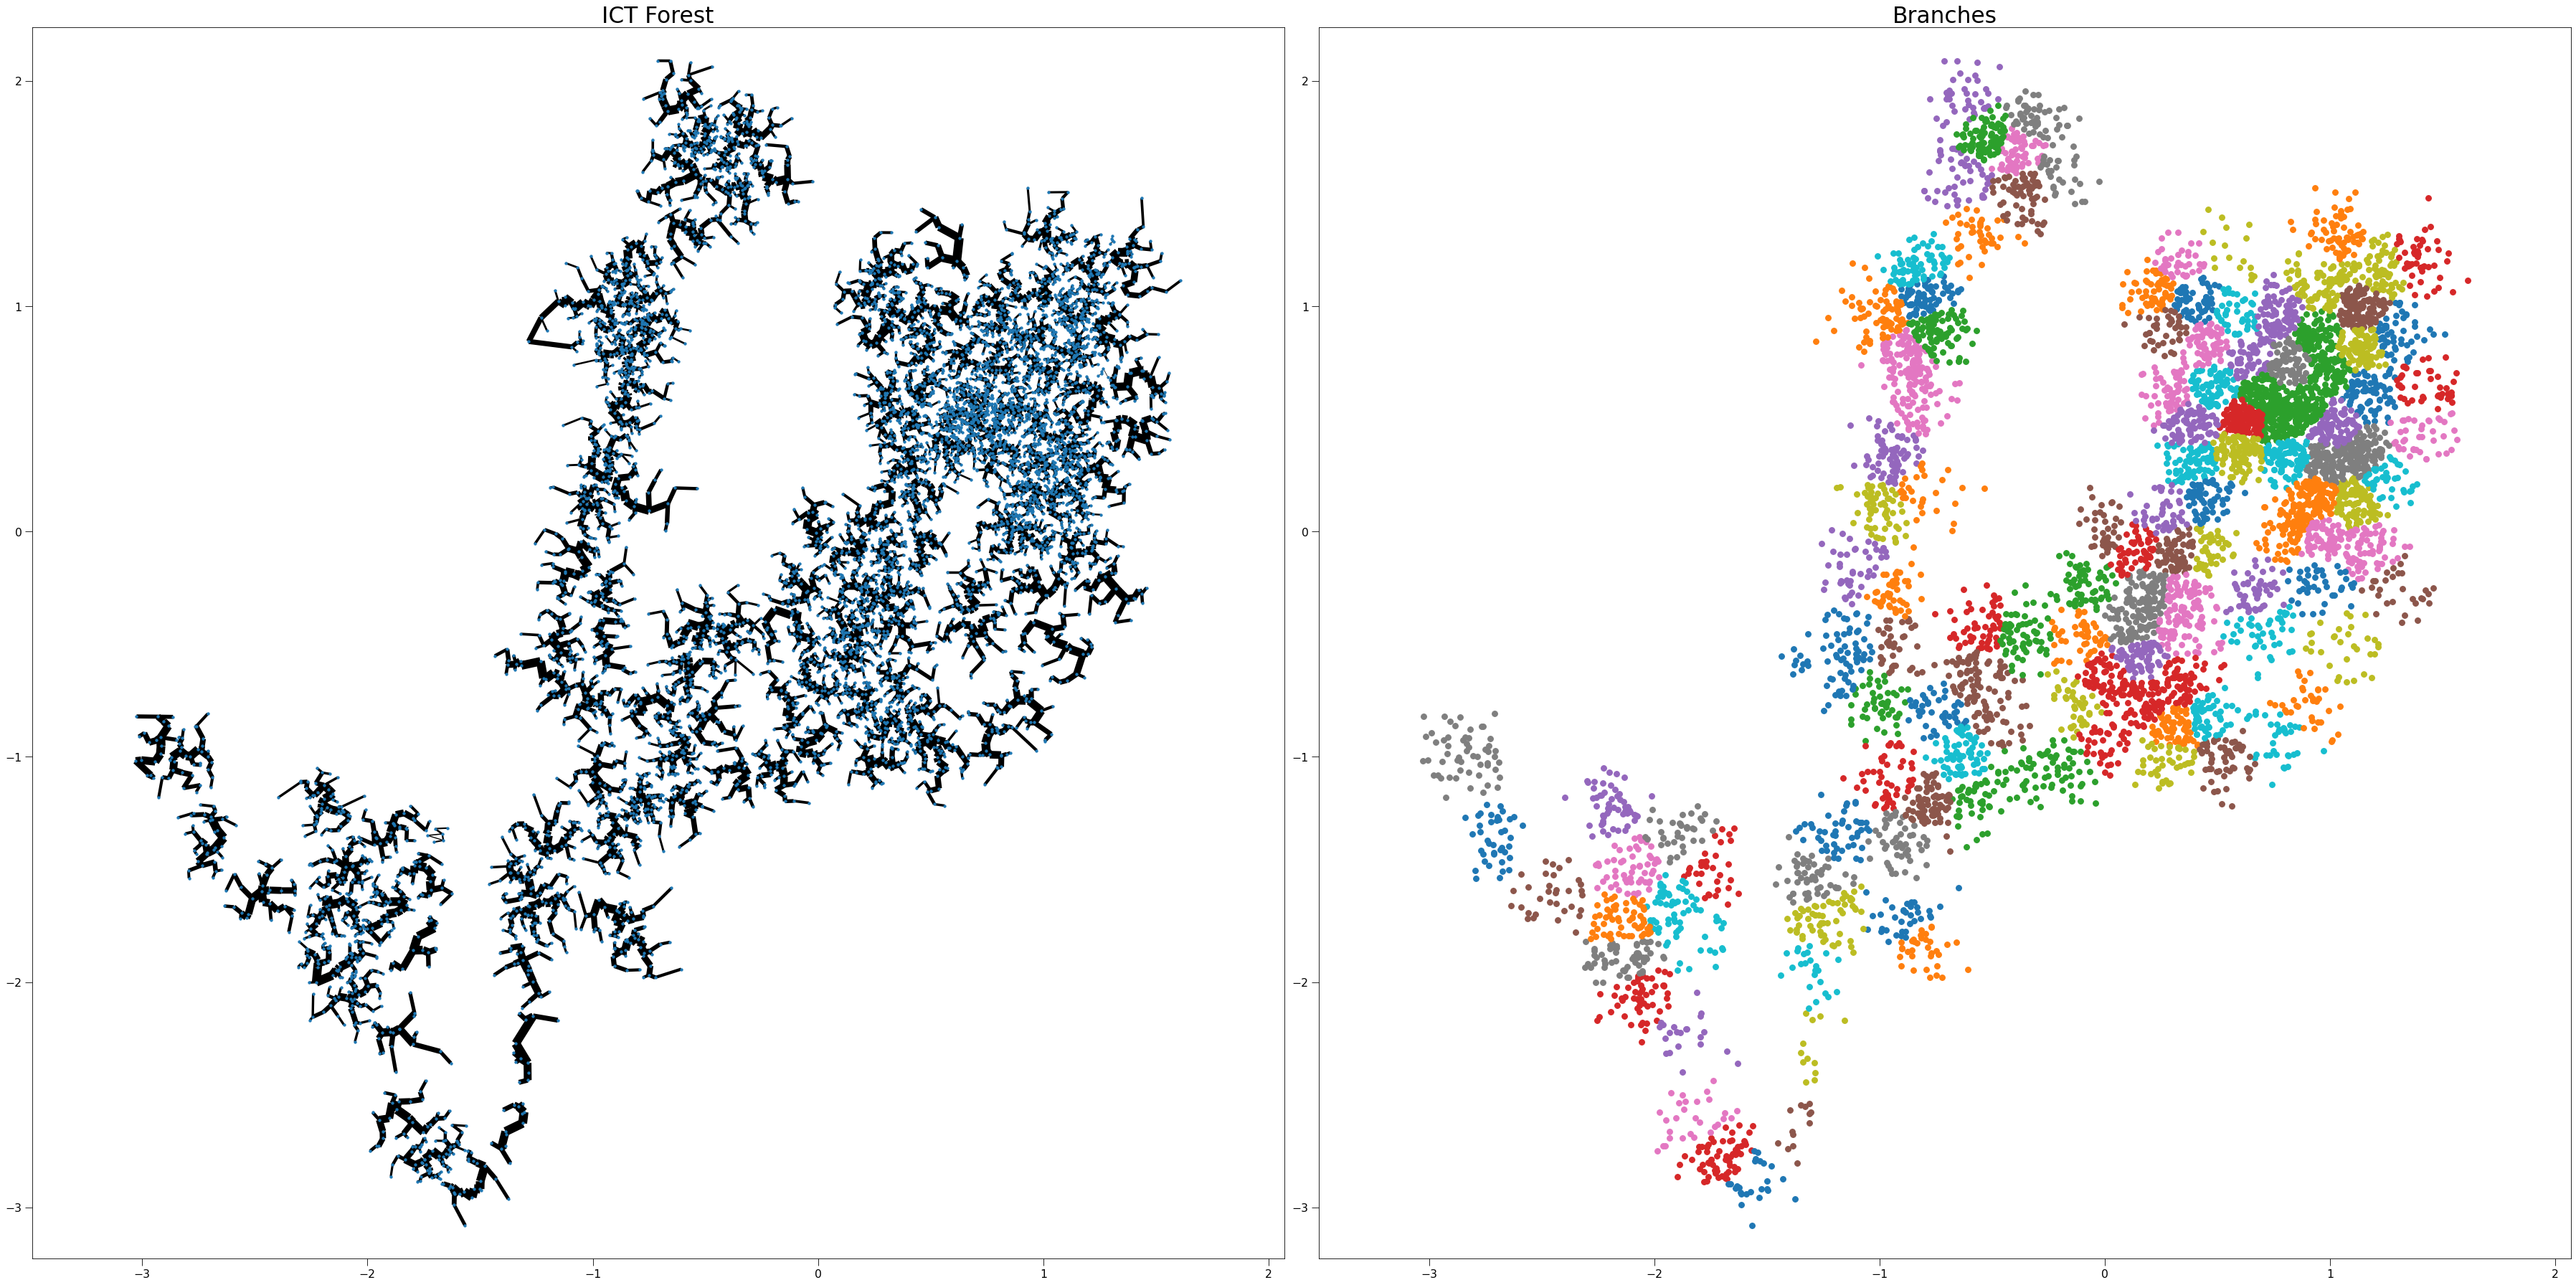

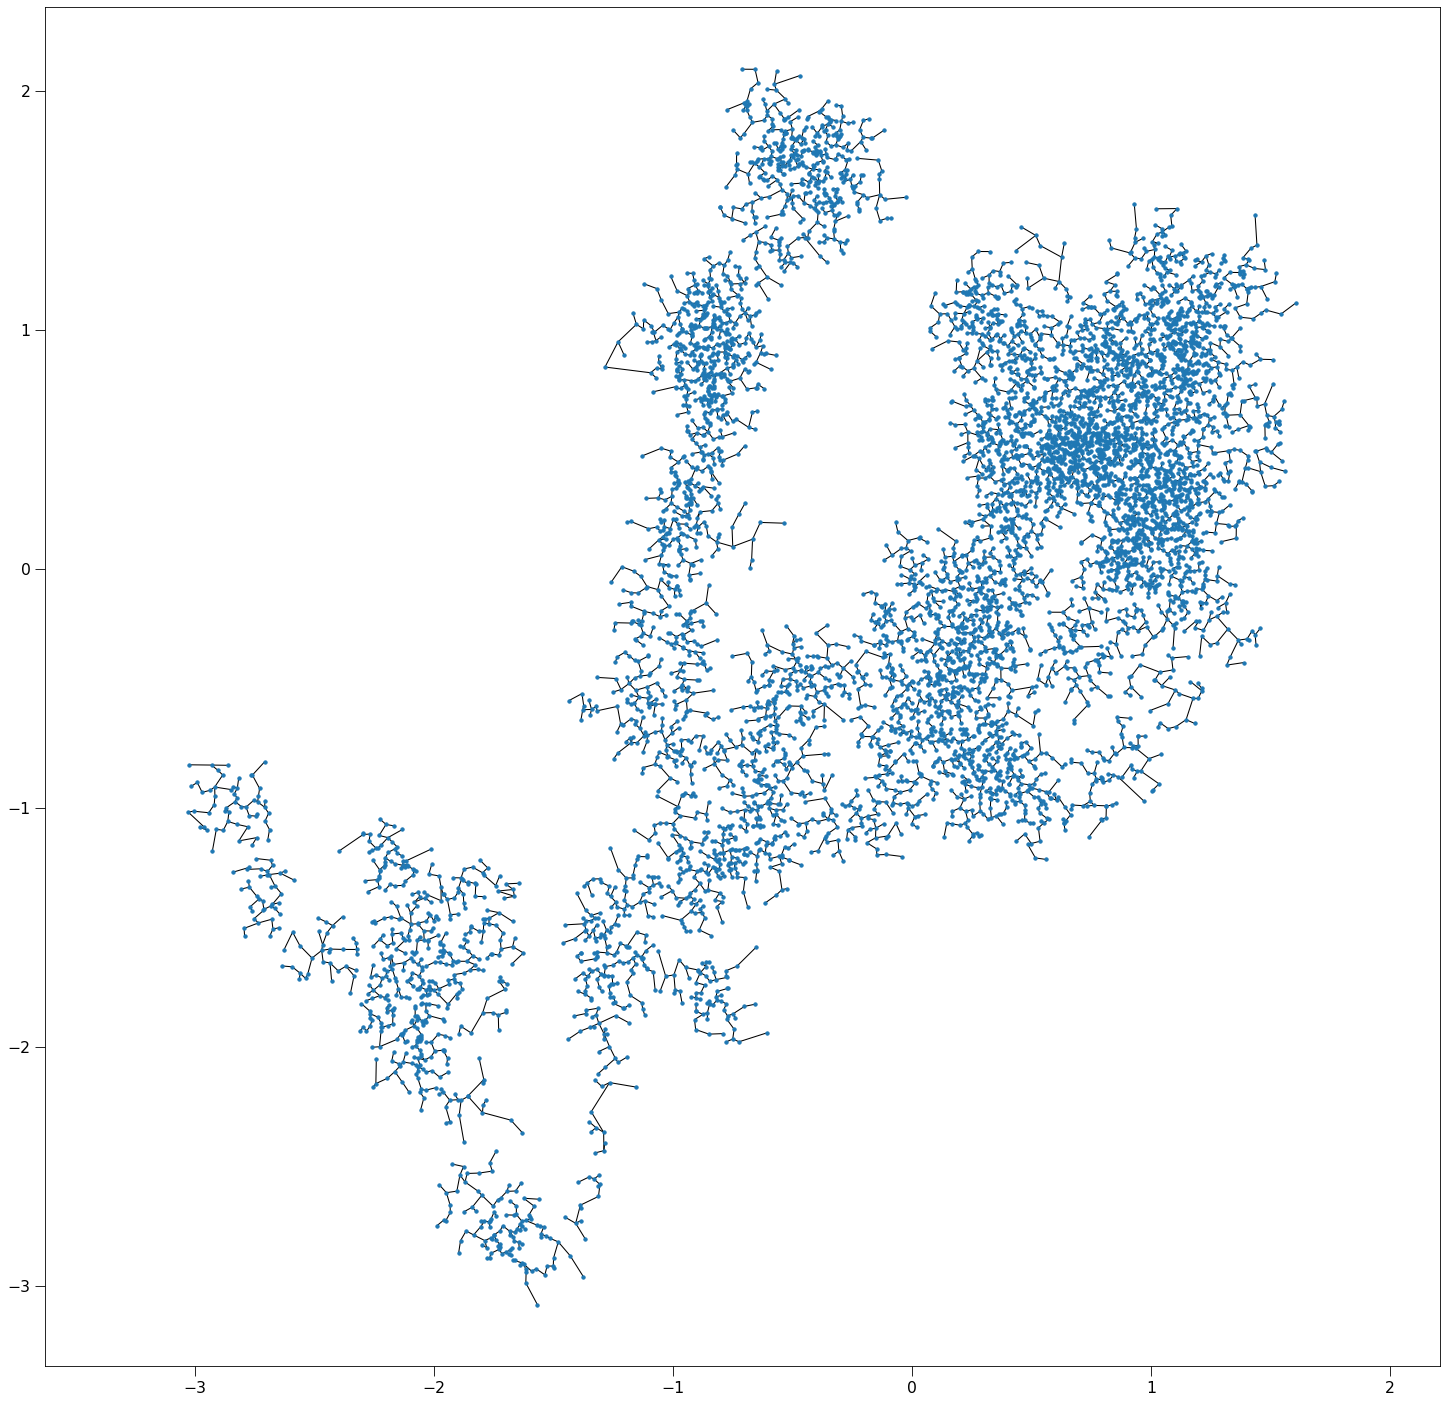

Patching the components together:   0%|          | 0/135 [00:00<?, ?it/s]

Patching the components together:   0%|          | 0/3 [00:00<?, ?it/s]

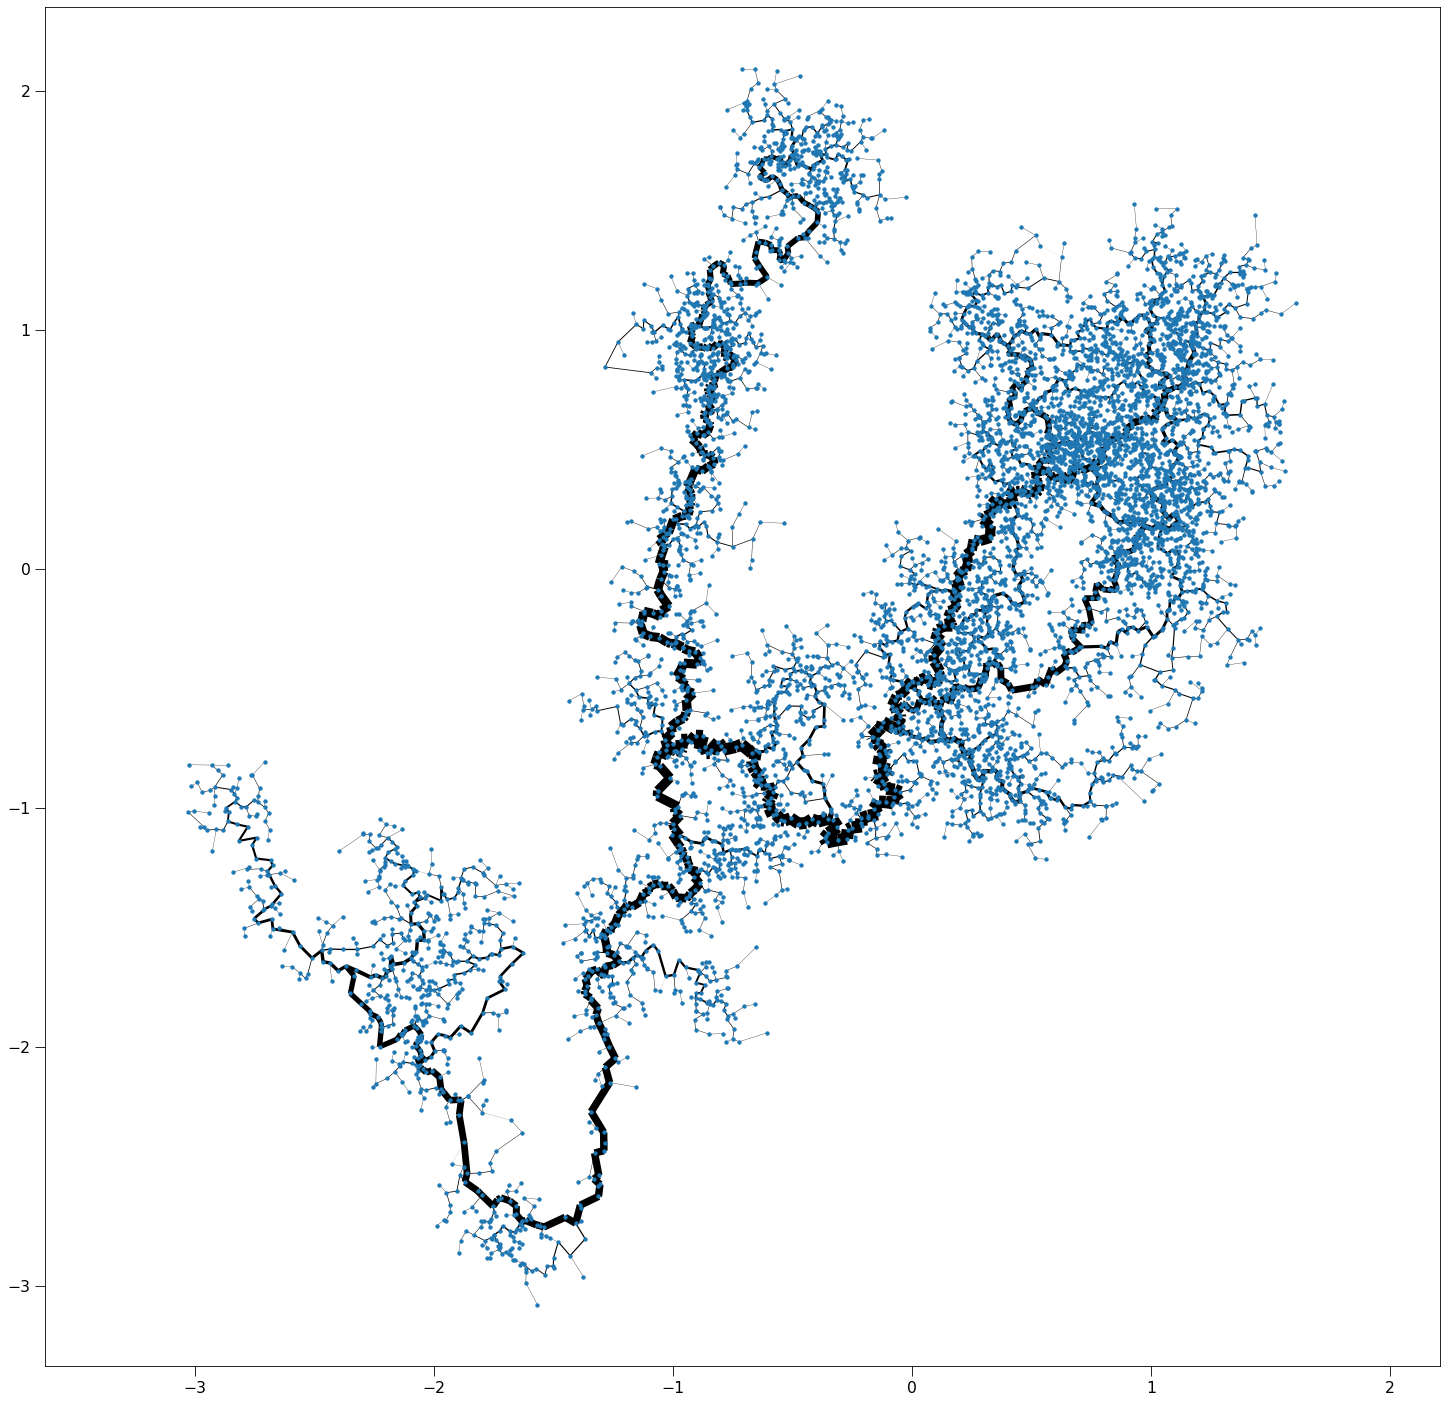

In [5]:
graphs = sub_ICTs
widths = []
for sub_ICT in sub_ICTs:
    widths.append(compute_widths(sub_ICT))
    
names = ["ICT Forest", "Branches"]

number_of_plots = 2
fig, ax = plt.subplots(1,2, figsize=(24*2,24))

for i, component in enumerate(components):
    nk.viztasks.drawGraph(graphs[i], pos=position[component], ax=ax[0], width=widths[i], node_size=10)
            

for component in components:
    ax[1].plot(*position[component].T)
    
for i, name in enumerate(names):
    ax[i].set_title(name)
    ax[i].axis("equal")
    ax[i].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax[i].set_axis_on()
    
    
plt.tight_layout()
plt.show()

from External.create_k_nearest import patch_together
from sklearn.metrics import pairwise_distances

G = nk.graph.Graph(n=len(position), weighted=True)

distances = pairwise_distances(position, position)

for component, sub_ICT in zip(components, sub_ICTs):
    for u, v, w in sub_ICT.iterEdgesWeights():
        nodeA = component[u]
        nodeB = component[v]
        G.addEdge(nodeA, nodeB, distances[nodeA, nodeB])
        
# plot the not connected graph
fig, ax = plt.subplots(1, figsize=(24,24))
nk.viztasks.drawGraph(G, pos=position, ax=ax, node_size=10)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_axis_on()
ax.axis("equal")
plt.show()


##############################
           # new #           #
##############################
good_edges = []              #
for u, v in G.iterEdges():   #
    good_edges.append([u,v]) #
##############################   
    


G = patch_together(G, position, bridges=4)
G.indexEdges()

# plot the not connected graph
fig, ax = plt.subplots(1, figsize=(24,24))
nk.viztasks.drawGraph(G, pos=position, ax=ax, width=compute_widths(G), node_size=10)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_axis_on()
ax.axis("equal")
plt.show()

In [6]:
# calculate the cluster ICT with all aim nodes
start = time.time()
ICT_cluster_all = calculate_ICT(G, algorithm_type="cluster_all", cluster_centers=cluster_centers,
                                zeros_stay_zeros=True, update_G=1.1, good_edges=good_edges)
ICT_cluster_all.indexEdges()

# widths of the edges
widths_cluster_all = compute_widths(ICT_cluster_all)
print(time.time()-start)

good [[0, 633], [0, 635], [1, 246], [2, 1049], [2, 628], [3, 1462], [3, 167], [4, 2346], [4, 2383], [4, 12], [5, 348], [6, 267], [7, 344], [7, 606], [7, 317], [8, 312], [8, 5104], [9, 5088], [9, 349], [10, 396], [10, 593], [11, 20], [11, 285], [12, 304], [13, 34], [13, 5090], [14, 2329], [14, 466], [14, 5069], [15, 269], [15, 16], [16, 2353], [17, 2324], [17, 282], [18, 621], [18, 2357], [19, 5100], [21, 2379], [22, 269], [23, 365], [23, 354], [24, 617], [24, 384], [25, 611], [25, 329], [26, 5107], [26, 301], [26, 491], [27, 31], [27, 28], [28, 5089], [29, 324], [30, 64], [31, 47], [31, 610], [32, 310], [33, 5089], [34, 463], [35, 482], [35, 2359], [35, 431], [36, 44], [36, 500], [37, 39], [37, 5097], [38, 594], [38, 56], [38, 427], [40, 579], [40, 570], [41, 67], [41, 98], [42, 56], [42, 5097], [43, 62], [43, 61], [44, 54], [44, 495], [45, 361], [46, 598], [46, 322], [47, 53], [47, 334], [48, 56], [49, 5102], [49, 342], [50, 51], [51, 52], [52, 601], [53, 603], [53, 598], [55, 427], [

create edgeId array:   0%|          | 0/7759 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/7759 [00:00<?, ?it/s]

7370


Iteration over all nodes:   0%|          | 0/7499 [00:00<?, ?it/s]

update Arr 7759 -> 7509
update Arr 7509 -> 7509
update Arr 7509 -> 7509
update Arr 7509 -> 7509
update Arr 7509 -> 7507
update Arr 7507 -> 7507
update Arr 7507 -> 7507
update Arr 7507 -> 7507
update Arr 7507 -> 7507
update Arr 7507 -> 7506
update Arr 7506 -> 7506
update Arr 7506 -> 7505
update Arr 7505 -> 7505
update Arr 7505 -> 7505
update Arr 7505 -> 7504
update Arr 7504 -> 7504
update Arr 7504 -> 7504
update Arr 7504 -> 7504
update Arr 7504 -> 7504
update Arr 7504 -> 7503
update Arr 7503 -> 7503
update Arr 7503 -> 7503
update Arr 7503 -> 7503
update Arr 7503 -> 7503
update Arr 7503 -> 7503
update Arr 7503 -> 7503
update Arr 7503 -> 7503
update Arr 7503 -> 7503
update Arr 7503 -> 7503
update Arr 7503 -> 7502
update Arr 7502 -> 7502
update Arr 7502 -> 7502
update Arr 7502 -> 7502
update Arr 7502 -> 7502
update Arr 7502 -> 7502
update Arr 7502 -> 7502
188.35011291503906


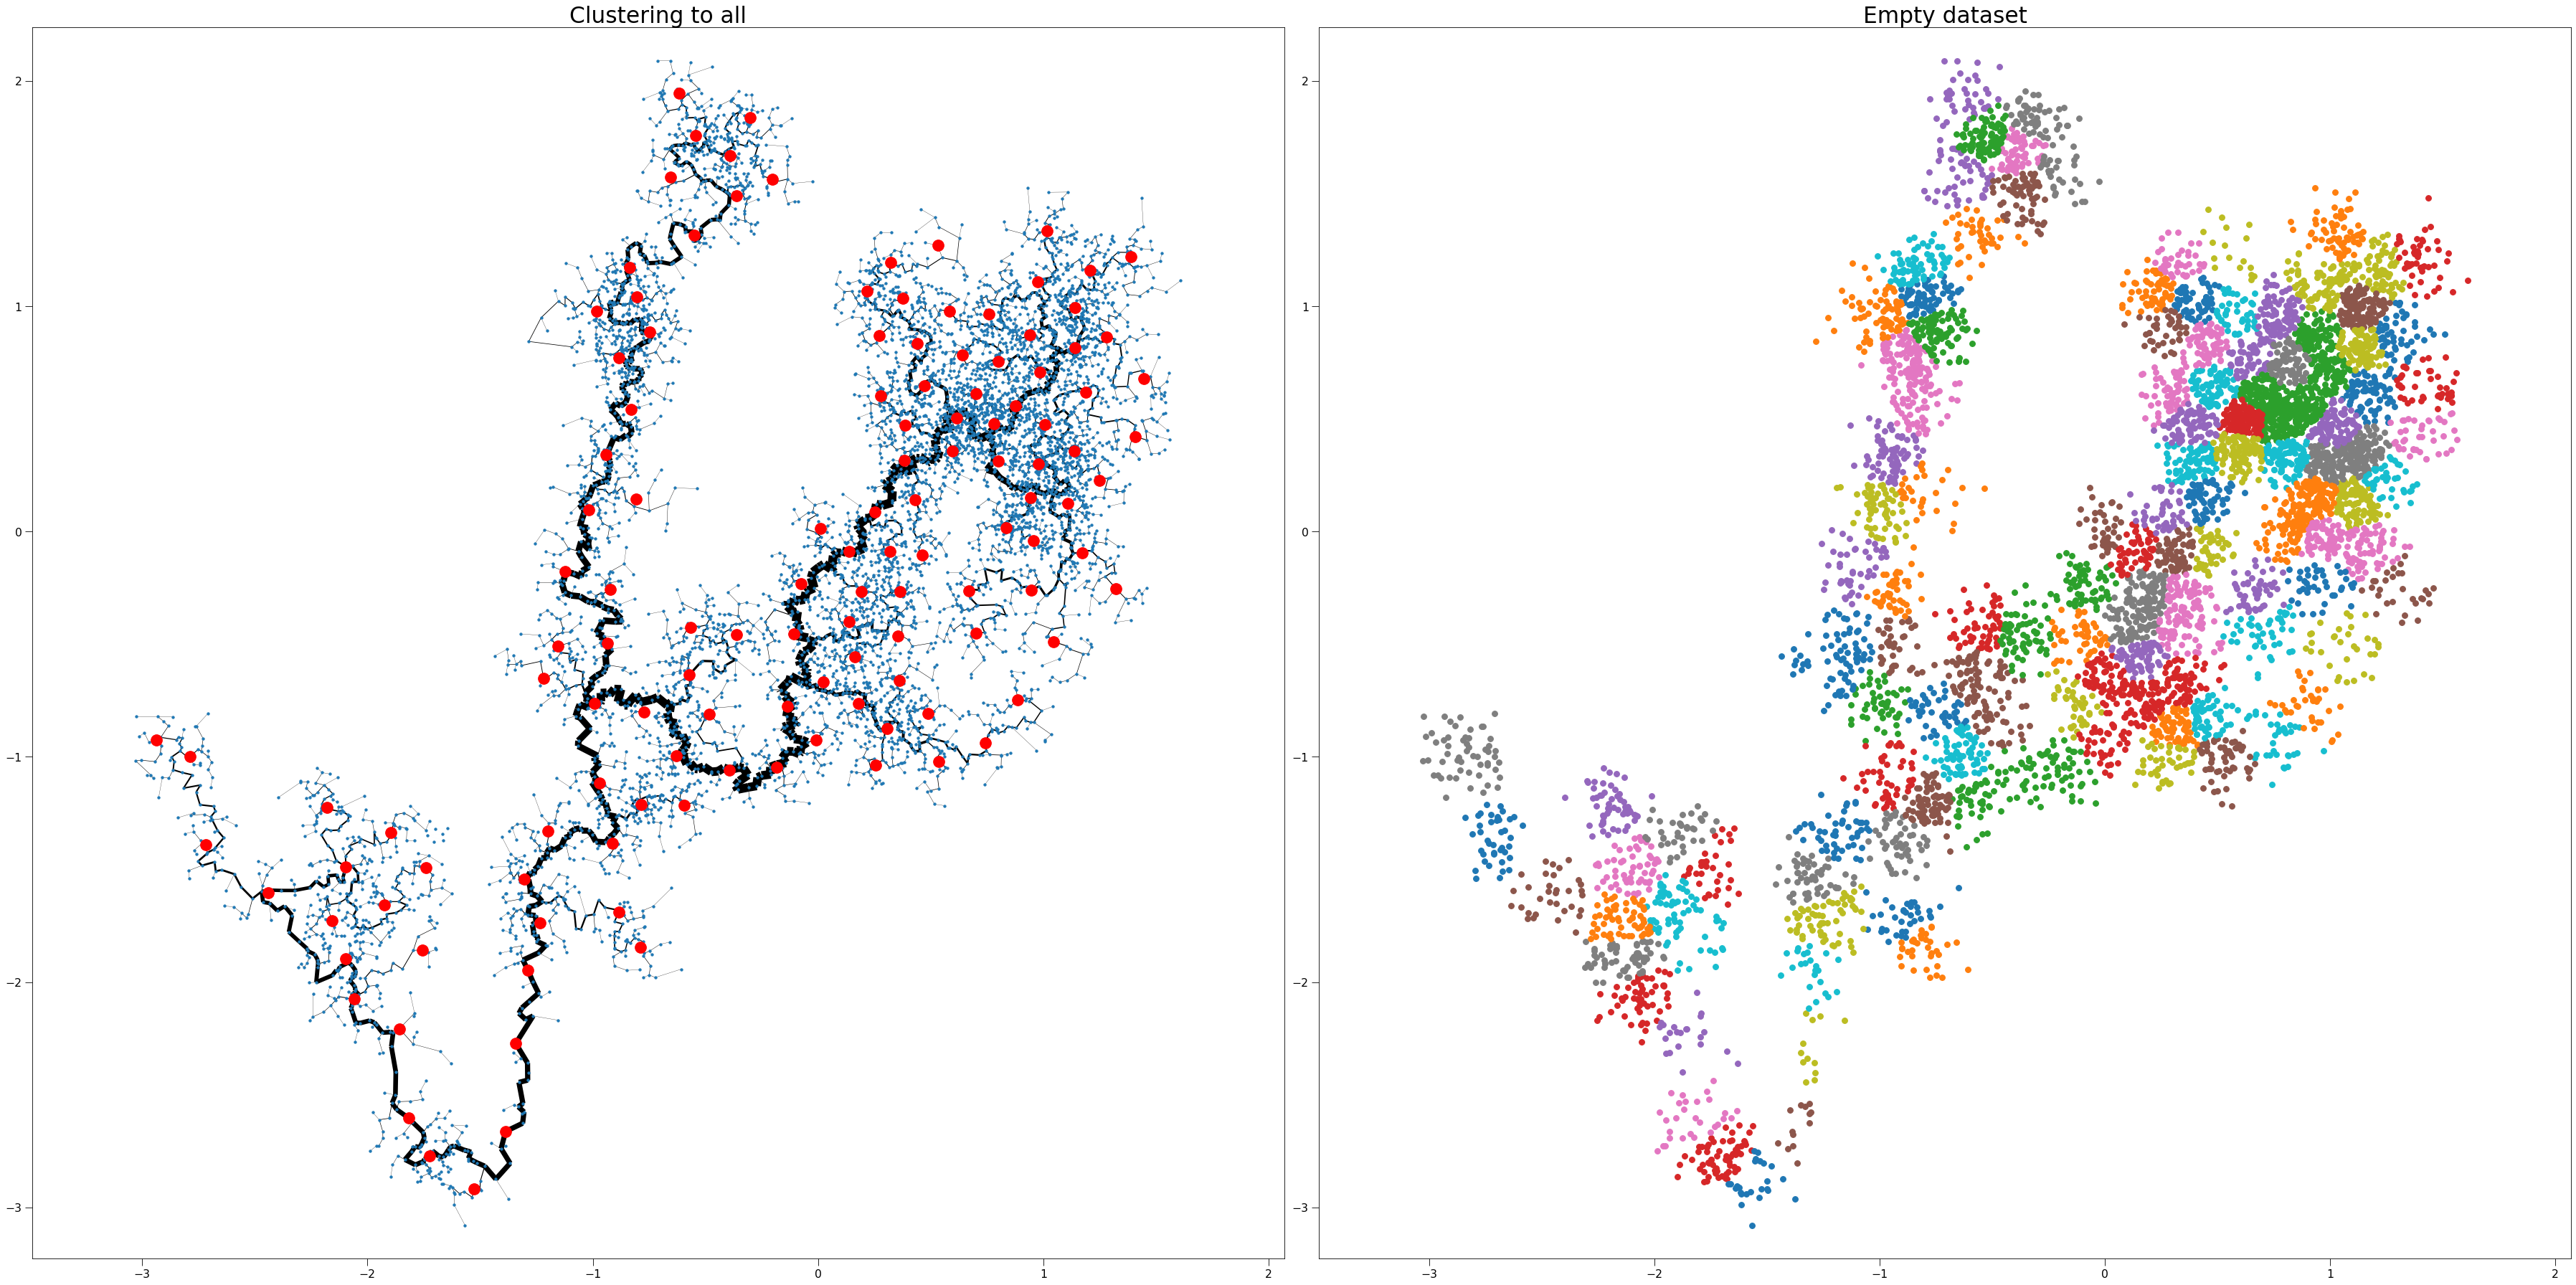

In [7]:
# plotting
graphs = [ICT_cluster_all]
widths = [widths_cluster_all]
names = ["Clustering to all", "Empty dataset"]


number_of_plots = len(names)
fig, ax = plt.subplots(1,2, figsize=(24*2,24))

if number_of_plots == 1:
    ax = [ax]
    
for i in range(number_of_plots):
    if i == 0:
        nk.viztasks.drawGraph(graphs[i], pos=position, ax=ax[i], width=widths[i], node_size=10)
        ax[i].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
        ax[i].plot(*position[cluster_centers].T, marker="o", color = "Red")
        ax[i].set_axis_on()
    else:
        for label in range(len(labels)):
            plt.plot(*position[np.argwhere(labels == label).T[0]].T, label=label)
    ax[i].set_title(names[i])
    ax[i].axis("equal")
    
plt.tight_layout()
plt.savefig("./Output/Images/2D-phate-11-1_25-1.png")
plt.show()